# CONSTRUCTION OF FX VOL SURFACE - PART III

In this notebook I show how you can calibrate to the FX Vol Surface to ATM, 25D and 10D at multiple expiry dates and analyse different volatility interpolation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.models.FinModelBlackScholes import *
from financepy.products.fx import *
from financepy.market.curves import FinDiscountCurveFlat
from financepy.market.volatility import *

####################################################################
# FINANCEPY BETA Version 0.190 - This build:  28 Dec 2020 at 13:33 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Load the Volatility Market Quotes

In [3]:
valueDate = FinDate(10, 4, 2020)

In [4]:
forName = "EUR"
domName = "USD"
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

We need to set up the option details - what you would find in the Term Sheet.

In [5]:
domDiscountCurve = FinDiscountCurveFlat(valueDate, domCCRate)
forDiscountCurve = FinDiscountCurveFlat(valueDate, forCCRate)

In [6]:
currencyPair = forName + domName
spotFXRate = 1.3465        

I now load the option tenor, the ATM vol and the market strangle and risk-reversal quotes.

In [7]:
tenors = ['1M', '2M', '3M', '6M', '1Y', '2Y']
atmVols = [21.00, 21.00, 20.750, 19.400, 18.250, 17.677]
ms25DeltaVols = [0.65, 0.75, 0.85, 0.90, 0.95, 0.85]
rr25DeltaVols = [-0.20, -0.25, -0.30, -0.50, -0.60, -0.562]
ms10DeltaVols = [2.433, 2.83, 3.228, 3.485, 3.806, 3.208]
rr10DeltaVols = [-1.258, -1.297, -1.332, -1.408, -1.359, -1.208]

We need to set some parameters for the vol surface.

In [8]:
notionalCurrency = forName
atmMethod = FinFXATMMethod.FWD_DELTA_NEUTRAL
deltaMethod = FinFXDeltaMethod.SPOT_DELTA

In [9]:
fxVolSurfaceClark = FinFXVolSurfacePlus(valueDate, spotFXRate, currencyPair, notionalCurrency,
                               domDiscountCurve, forDiscountCurve,
                               tenors, atmVols, ms25DeltaVols, rr25DeltaVols, ms10DeltaVols, rr25DeltaVols,
                               atmMethod, deltaMethod, FinVolFunctionTypes.CLARK)

INIT PARAMS [-1.5606477482646683, 0.01066877982487659, 0.6850858860715585]
INIT PARAMS [-1.5606477482646683, 0.013113842476254781, 0.7900568476322534]
INIT PARAMS [-1.5726239393113841, 0.01563954007388074, 0.9035683069955374]
INIT PARAMS [-1.639897119918809, 0.027311551838801237, 1.0321808472134995]
INIT PARAMS [-1.701005105959591, 0.03400644980842172, 1.1832942590973907]
INIT PARAMS [-1.7329058264343453, 0.03363861121024249, 1.0417269789605608]
PARAMS [-1.56055141  0.01591111  0.59825507]
PARAMS [-1.56049579  0.02195243  0.68182305]
PARAMS [-1.57241786  0.02771233  0.76910281]
PARAMS [-1.63939683  0.0443115   0.86705937]
PARAMS [-1.70026218  0.06079367  0.98677422]
PARAMS [-1.73158891  0.07200934  0.90983426]


In [10]:
fxVolSurfaceSABR = FinFXVolSurfacePlus(valueDate, spotFXRate, currencyPair, notionalCurrency,
                               domDiscountCurve, forDiscountCurve,
                               tenors, atmVols, ms25DeltaVols, rr25DeltaVols, ms10DeltaVols, rr25DeltaVols,
                               atmMethod, deltaMethod, FinVolFunctionTypes.SABR)

INIT PARAMS [0.174, 0.817, -0.112]
INIT PARAMS [0.174, 0.817, -0.112]
INIT PARAMS [0.174, 0.817, -0.112]
INIT PARAMS [0.174, 0.817, -0.112]
INIT PARAMS [0.174, 0.817, -0.112]
INIT PARAMS [0.174, 0.817, -0.112]
PARAMS [ 0.20354653  2.16683464 -0.02572628]
PARAMS [ 0.20269549  1.62961872 -0.03559838]
PARAMS [ 0.19939525  1.42479696 -0.04443878]
PARAMS [ 0.18565715  1.0755089  -0.06749127]
PARAMS [ 0.17392601  0.81942435 -0.09223641]
PARAMS [ 0.16985878  0.55479445 -0.11081472]


In [11]:
fxVolSurfaceBBG = FinFXVolSurfacePlus(valueDate, spotFXRate, currencyPair, notionalCurrency,
                               domDiscountCurve, forDiscountCurve,
                               tenors, atmVols, ms25DeltaVols, rr25DeltaVols, ms10DeltaVols, rr25DeltaVols,
                               atmMethod, deltaMethod, FinVolFunctionTypes.BBG)

INIT PARAMS [0.15206249999999988, -0.14956249999999982, 0.24676562499999996]
INIT PARAMS [0.1768749999999999, -0.17374999999999985, 0.25265624999999997]
INIT PARAMS [0.20174999999999998, -0.19799999999999995, 0.25606249999999997]
INIT PARAMS [0.21781249999999996, -0.2115625, 0.24532812499999998]
INIT PARAMS [0.23787500000000006, -0.2303750000000001, 0.23821875]
INIT PARAMS [0.2004999999999999, -0.19347499999999984, 0.22338249999999998]
PARAMS [ 0.13424509 -0.13178777  0.24232426]
PARAMS [ 0.15397484 -0.15078682  0.24688056]
PARAMS [ 0.17302163 -0.16909166  0.24875906]
PARAMS [ 0.18428104 -0.17790133  0.23681561]
PARAMS [ 0.19895595 -0.19089426  0.22807802]
PARAMS [ 0.17456308 -0.16646556  0.21622514]


We can examine the calibration

In [12]:
fxVolSurfaceClark.checkCalibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1M
EXPIRY DATE: 10-MAY-2020
IN ATM VOL: 21.000000 %
IN MKT STRANGLE 25D VOL:  0.650000 %
IN RSK REVERSAL 25D VOL: -0.200000 %
IN MKT STRANGLE 10D VOL:  2.433000 %
IN RSK REVERSAL 10D VOL: -0.200000 %
T_(YEARS):  0.0821917808219178
CNT_CPD_RD: 2.931967 %
CNT_CPD_RF: 3.450546 %
FWD_RATE:   1.345926
VOL FUNCTION FinVolFunctionTypes.CLARK
VOL_PARAMETERS: [-1.56055141  0.01591111  0.59825507]
OUT_K_ATM:   1.348368
OUT_ATM_VOL: 20.999822 %
FAILED FIT TO ATM VOL IN: 21.000000  OUT: 20.999822  DIFF: -0.000178
CALL_DELTA:  0.498584  PUT_DELTA: -0.498584  NET_DELTA: -0.000000
MKT STRANGLE 25D VOL IN:  0.650000 %
K_25D_C_MS:  1.405980  ATM + MSVOL: 21.650000 %   DELTA:  0.250000
K_25D_P_MS:  1.293411  ATM + MSVOL: 21.650000 %   DELTA: -0.250000
CALL_VALUE:  0.012099  PUT_VALUE:  0.012876  MS_VALUE:  0.024975
K_25D_C_MS:  1.405980  SURFACE_VOL: 21.816081 %   DE

In [13]:
fxVolSurfaceSABR.checkCalibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1M
EXPIRY DATE: 10-MAY-2020
IN ATM VOL: 21.000000 %
IN MKT STRANGLE 25D VOL:  0.650000 %
IN RSK REVERSAL 25D VOL: -0.200000 %
IN MKT STRANGLE 10D VOL:  2.433000 %
IN RSK REVERSAL 10D VOL: -0.200000 %
T_(YEARS):  0.0821917808219178
CNT_CPD_RD: 2.931967 %
CNT_CPD_RF: 3.450546 %
FWD_RATE:   1.345926
VOL FUNCTION FinVolFunctionTypes.SABR
VOL_PARAMETERS: [ 0.20354653  2.16683464 -0.02572628]
OUT_K_ATM:   1.348368
OUT_ATM_VOL: 20.999927 %
CALL_DELTA:  0.498584  PUT_DELTA: -0.498584  NET_DELTA: -0.000000
MKT STRANGLE 25D VOL IN:  0.650000 %
K_25D_C_MS:  1.405980  ATM + MSVOL: 21.650000 %   DELTA:  0.250000
K_25D_P_MS:  1.293411  ATM + MSVOL: 21.650000 %   DELTA: -0.250000
CALL_VALUE:  0.012099  PUT_VALUE:  0.012876  MS_VALUE:  0.024975
K_25D_C_MS:  1.405980  SURFACE_VOL: 21.601677 %   DELTA:  0.249479
K_25D_P_MS:  1.293411  SURFACE_VOL: 21.709326 %   DELTA

In [14]:
fxVolSurfaceBBG.checkCalibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1M
EXPIRY DATE: 10-MAY-2020
IN ATM VOL: 21.000000 %
IN MKT STRANGLE 25D VOL:  0.650000 %
IN RSK REVERSAL 25D VOL: -0.200000 %
IN MKT STRANGLE 10D VOL:  2.433000 %
IN RSK REVERSAL 10D VOL: -0.200000 %
T_(YEARS):  0.0821917808219178
CNT_CPD_RD: 2.931967 %
CNT_CPD_RF: 3.450546 %
FWD_RATE:   1.345926
VOL FUNCTION FinVolFunctionTypes.BBG
VOL_PARAMETERS: [ 0.13424509 -0.13178777  0.24232426]
OUT_K_ATM:   1.348368
OUT_ATM_VOL: 20.999165 %
FAILED FIT TO ATM VOL IN: 21.000000  OUT: 20.999165  DIFF: -0.000835
CALL_DELTA:  0.498583  PUT_DELTA: -0.498585  NET_DELTA: -0.000002
MKT STRANGLE 25D VOL IN:  0.650000 %
K_25D_C_MS:  1.405980  ATM + MSVOL: 21.650000 %   DELTA:  0.250000
K_25D_P_MS:  1.293411  ATM + MSVOL: 21.650000 %   DELTA: -0.250000
CALL_VALUE:  0.012099  PUT_VALUE:  0.012876  MS_VALUE:  0.024975
K_25D_C_MS:  1.405980  SURFACE_VOL: 21.819154 %   DELT

## Volatility Smile Analysis - Different Volatility Function Types

In [15]:
strikes = np.linspace(0.5, 2.5, 1000)

In [16]:
expiryDate = valueDate.addTenor("1Y")

In [17]:
volsClark = []
volsSABR = []
volsBBG = []

for k in strikes:
    volClark = fxVolSurfaceClark.volatility(k, expiryDate)
    volSABR = fxVolSurfaceSABR.volatility(k, expiryDate)
    volBBG = fxVolSurfaceBBG.volatility(k, expiryDate)
    volsClark.append(volClark*100.0)    
    volsSABR.append(volSABR*100.0)    
    volsBBG.append(volBBG*100.0)    

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647955285943815 vol1 0.24094855794446965
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.4649219105207949 vol1 0.39131614316388486
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319532098350438 vol1 0.23613970199515757
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647955285942075 vol1 0.24094855682874464
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.46380705578079123 vol1 0.39043050661608575
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319532098349572 vol1 0.236139701460037
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1

vol0 0.24647955277681177 vol1 0.2409480825022924
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.4249658241512063 vol1 0.35961290310400235
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319532093960003 vol1 0.23613945951450224
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647955276256023 vol1 0.2409480361935062
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.42397531828462237 vol1 0.3588281257810132
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319532093192717 vol1 0.23613943540866086
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647955274598551 vol1 0.24094798583862054
1 1.0 0.16712328767123288
2 1.

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.40101567900666774 vol1 0.34065683424935705
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319531921862936 vol1 0.2361376019010551
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647954923912896 vol1 0.2409443067755773
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.4000910737614566 vol1 0.33992592756919615
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2431953189647899 vol1 0.23613743080328048
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2464795487296327 vol1 0.24094397085304664
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.3575093490099187 vol1 0.30636031986314843
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319479874000008 vol1 0.23608129139749334
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2464786025707877 vol1 0.24084174814816717
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.35669111904331824 vol1 0.3057175407304811
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2431947467076381 vol1 0.2360779415168443
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647851009608274 vol1 0.24083582813347076
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0

vol0 0.2464720803915632 vol1 0.24059393565479992
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.3375947414380529 vol1 0.2907466461742331
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24319064964694795 vol1 0.2359275855169066
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647146772959208 vol1 0.24057726360385742
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.3368208094558526 vol1 0.290141273024139
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2431902597986805 vol1 0.23591730850708856
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24647080952223485 vol1 0.24055992672996812
1 1.0 0.16712328767123288
2 1.0 0.

3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2429063369424218 vol1 0.23368452322246516
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24602974042818718 vol1 0.23706394123410124
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.29125352562161877 vol1 0.2547560362425038
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24289083856806779 vol1 0.23360674410225102
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24600633982501252 vol1 0.23694730779895049
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2905785297191788 vol1 0.254236678209594
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24287462450717967 vol

vol0 0.2786800573589729 vol1 0.24511250139864876
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24242632471150355 vol1 0.23173383014887455
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24531815928112718 vol1 0.23420188363786779
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2780330489003048 vol1 0.24461814653943778
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24239059485802628 vol1 0.23161256748509523
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2452660168867369 vol1 0.2340277991530205
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2773875252515 vol1 0.24412512417850502
1 1.0 0.16712328767123288
2 1.0 0.

index0 3 index1 4
vol0 0.23527221412169302 vol1 0.21627609853747123
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23882794945858837 vol1 0.21512868233080853
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23471359281026816 vol1 0.21765935876517584
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23498524894451944 vol1 0.21592368476623933
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2382925584823845 vol1 0.214733907547372
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23448255033290077 vol1 0.2173611140653498
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23469387386324148 vol1 0.21556996119269792
1 1.0 0.1671

vol0 0.22946209504823908 vol1 0.209789315730958
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22951022571156224 vol1 0.20829726559477557
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22992373202358965 vol1 0.2120136357776704
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22910215055966987 vol1 0.2094241495913207
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22901340360639041 vol1 0.20793544138718756
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2296192896322067 vol1 0.21168570042099735
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22873873203928305 vol1 0.2090589721402868
1 1.0 0.16712328767123288
2 1.0 

index0 3 index1 4
vol0 0.20315144330689036 vol1 0.18944165079035025
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2057842793023532 vol1 0.1912787774285189
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2035320469628429 vol1 0.1888638238430691
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20286113589653373 vol1 0.18923616910413632
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20542729606270416 vol1 0.19101759334835997
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20320148573804855 vol1 0.18863994000805168
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.202575029044571 vol1 0.18903357176738145
1 1.0 0.167123

4 1.0 1.0
index0 3 index1 4
vol0 0.1972196699024625 vol1 0.18519456199050247
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19817643108856087 vol1 0.18579649001914622
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19686978920447548 vol1 0.18444437469149108
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19704259167293184 vol1 0.18506419947386354
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19794101055516147 vol1 0.18562669367156986
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19668004791534702 vol1 0.18432006033542456
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19687033083054736 vol1 0.18493693573024508

vol0 0.19655038397511448 vol1 0.18339443777566938
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19736737474407812 vol1 0.18433490344065837
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19577414003104385 vol1 0.18308232111745487
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19672309838767074 vol1 0.1834847946456008
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19754884667963707 vol1 0.18444342484558948
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19589821428016915 vol1 0.18314402729869922
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.1969003022005844 vol1 0.18357838184625047
1 1.0 0.16712328767123288
2 

3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20026653071933367 vol1 0.18548186151382146
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20114042288313905 vol1 0.18666389419414425
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19852383337198581 vol1 0.18454602565125325
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20050504731570998 vol1 0.18562405725945427
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20137659968949448 vol1 0.1868144668240433
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.19870620165686048 vol1 0.18464801275007042
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.20074627508050158

3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.21492903983081058 vol1 0.19466665609848294
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.21811922756211882 vol1 0.1984122301630036
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2183104886720332 vol1 0.19937292399433307
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2152227679552525 vol1 0.19485894922786648
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.21836309211244553 vol1 0.19862742263283426
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2185422457599488 vol1 0.1995774998172008
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.21551727709892818 vol

index0 3 index1 4
vol0 0.22243767463732791 vol1 0.20245261598340586
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22240913889648734 vol1 0.20319917045063995
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22093179701558988 vol1 0.19864791480121038
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22264556801226498 vol1 0.20266093632254
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2226061337529403 vol1 0.20339570546561428
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22123787210088727 vol1 0.19885360489630574
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.22285144804448564 vol1 0.202868671722642
1 1.0 0.167123

2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23183055028465355 vol1 0.21404108656270082
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23125366295134453 vol1 0.21404692453785856
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24099620145950046 vol1 0.21255106024749973
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23192122977115137 vol1 0.21418833322952158
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2313380876472321 vol1 0.21418362355462553
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24131174645387427 vol1 0.2127753079447842
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4


3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2482290670398746 vol1 0.21772511615234297
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2336481529111242 vol1 0.21726907607197835
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2329386696203625 vol1 0.2170351190942127
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24854204147688164 vol1 0.21795051081851047
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23370918675883898 vol1 0.21738994297104225
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23299493774837315 vol1 0.21714661909122487
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.24885486458804387 vo

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2359345866715019 vol1 0.22293929979333943
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23502300739682627 vol1 0.2222216244711282
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2675662401293275 vol1 0.23184281068618628
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23595353523052312 vol1 0.22300407421484095
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23503997670055932 vol1 0.2222801744230315
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2678658949203196 vol1 0.23206423998892012
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23529166141402696 vol1 0.22322504482063427
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.27321606142992566 vol1 0.23602911486359865
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23624859429629105 vol1 0.22410514993776914
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2353030176812697 vol1 0.2232718448496459
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.27351083368521323 vol1 0.23624816489349648
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23626112608472316 vol1 0.22415669261858187
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.29070867930430333 vol1 0.24912205968296425
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23667750301567494 vol1 0.2263386990890719
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2356791962314061 vol1 0.2252547876041092
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2909871015210714 vol1 0.24933183672204157
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23668076733717258 vol1 0.22636286678901257
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2356820088400986 vol1 0.22527594160050407
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0

1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23572457090460167 vol1 0.22562780860483098
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2964992566135726 vol1 0.2534926748049358
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23673242724314814 vol1 0.22678500730819628
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23572632216182404 vol1 0.22564391142091528
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.296772061471523 vol1 0.2536989685787703
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23673443076191647 vol1 0.22680330966509382
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0

index0 3 index1 4
vol0 0.3136892286868941 vol1 0.2665511879141641
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.236799235750687 vol1 0.2275776019175513
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23578274114950756 vol1 0.22632406619159864
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.3139452774125772 vol1 0.26674652804891025
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23679964961567446 vol1 0.2275850182987203
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23578308449554 vol1 0.22633033316722784
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.31420107781519896 vol1 0.2669417007685403
1 1.0 0.16712328767

vol0 0.3192654296875302 vol1 0.2708101430864507
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2368063216545078 vol1 0.22771843944908501
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23578859654648027 vol1 0.22644260668547714
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.31951608935131753 vol1 0.2710018225675565
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23680655960352467 vol1 0.2277238355460991
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2357887921625932 vol1 0.22644712675166534
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.31976650779650867 vol1 0.2711933369055726
1 1.0 0.16712328767123288
2 1.0 0

4 1.0 1.0
index0 3 index1 4
vol0 0.23579465056745164 vol1 0.2266239061472808
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.33436277648306667 vol1 0.2823871295455845
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23681380089697093 vol1 0.22793919888398617
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2357946899852758 vol1 0.22662568781086206
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.3345991112758536 vol1 0.28256883618277756
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23681384873705869 vol1 0.22794134353620374
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23579472836365517 vol1 0.22662744201923346
1 

3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.33904795279293565 vol1 0.28599183665586636
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23681455388271028 vol1 0.22797646356951345
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2357952920788081 vol1 0.226656066786286
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.33927994021226787 vol1 0.2861704579853486
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.2368145820485681 vol1 0.2279780447566046
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.23579531450426638 vol1 0.22665735057996075
1 1.0 0.16712328767123288
2 1.0 0.2493150684931507
3 1.0 0.5013698630136987
4 1.0 1.0
index0 3 index1 4
vol0 0.33951171371800054 vol1

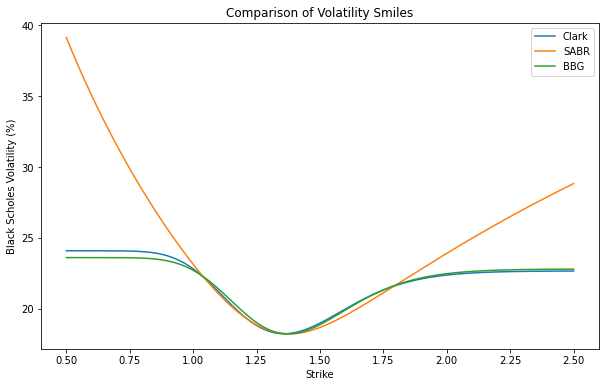

In [18]:
plt.figure(figsize=(10,6))
plt.plot(strikes, volsClark, label="Clark")
plt.plot(strikes, volsSABR, label="SABR")
plt.plot(strikes, volsBBG, label="BBG")
plt.xlabel("Strike")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Smiles")
plt.legend();

## Implied FX Rate Probability Density Functions

In [19]:
lower = 0.50
upper = 2.25
dbnClark = fxVolSurfaceClark.impliedDbns(lower, upper, 1000)
dbnSABR = fxVolSurfaceSABR.impliedDbns(lower, upper, 1000)
dbnBBG = fxVolSurfaceBBG.impliedDbns(lower, upper, 1000)

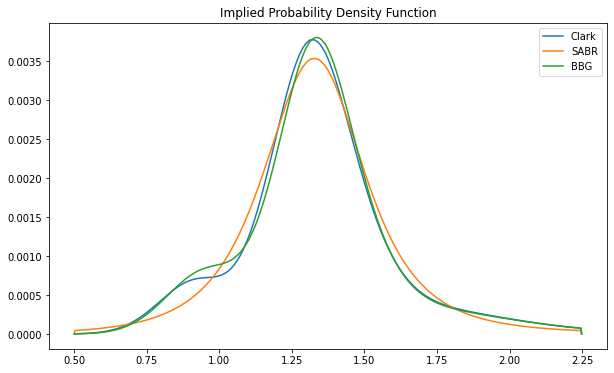

In [20]:
plt.figure(figsize=(10,6))
plt.plot(dbnClark[0]._x, dbnClark[0]._densitydx, label="Clark")
plt.plot(dbnSABR[0]._x, dbnSABR[0]._densitydx, label="SABR")
plt.plot(dbnBBG[0]._x, dbnBBG[0]._densitydx, label="BBG")
plt.title("Implied Probability Density Function")
plt.legend();

## Expiry Date Interpolation

We only have one expiry date. The volatility is therefore assumed to be flat at the level of this expiry date.

In [21]:
k = 1.30

In [22]:
years = np.linspace(0.0, 2.0, 100)

In [23]:
expiryDates = valueDate.addYears(years)

In [24]:
volsClark = []
volsSABR = []
volsBBG = []

for expiryDate in expiryDates:
    
    volClark = fxVolSurfaceClark.volatility(k, expiryDate)
    volSABR = fxVolSurfaceSABR.volatility(k, expiryDate)
    volBBG = fxVolSurfaceBBG.volatility(k, expiryDate)

    volsClark.append(volClark*100.0)    
    volsSABR.append(volSABR*100.0)    
    volsBBG.append(volBBG*100.0)    

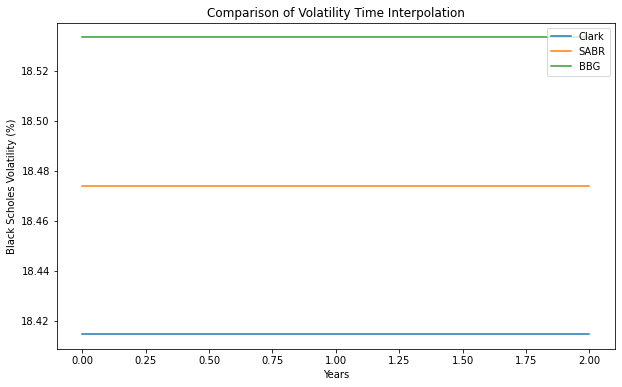

In [25]:
plt.figure(figsize=(10,6))
plt.plot(years, volsClark, label="Clark")
plt.plot(years, volsSABR, label="SABR")
plt.plot(years, volsBBG, label="BBG")
plt.xlabel("Years")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Time Interpolation")
plt.legend();

Copyright (c) 2020, Dominic O'Kane 